# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     2.975579e+01     6.729682e+00
 * time: 0.001714944839477539
     1     2.680747e+01     4.119773e+00
 * time: 0.007308006286621094
     2     1.736943e+01     3.110439e+00
 * time: 0.014127969741821289
     3     1.125729e+01     1.683668e+00
 * time: 0.020334959030151367
     4     1.018054e+01     1.932768e+00
 * time: 0.024263858795166016
     5     9.406437e+00     1.344540e+00
 * time: 0.02780294418334961
     6     8.983966e+00     9.847382e-01
 * time: 0.03162693977355957
     7     8.642611e+00     9.275665e-01
 * time: 0.03576993942260742
     8     8.322517e+00     5.986469e-01
 * time: 0.0395050048828125
     9     8.101495e+00     5.111054e-01
 * time: 0.04315686225891113
    10     7.945658e+00     3.642608e-01
 * time: 0.04671788215637207
    11     7.909079e+00     6.492990e-01
 * time: 0.04993104934692383
    12     7.882317e+00     4.377885e-01
 * time: 0.05479598045349121
    13     7.854065e+00     3.777697e-01
 * t

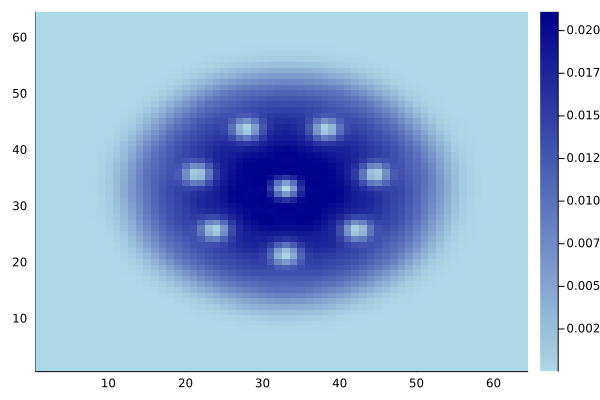

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)